<span style="float: left;padding: 1.3em">![logo](https://drive.google.com/uc?id=1zbQJxqu8KdXdC0IgCtiHqUtAYiziQxfw)</span>

# XV Taller de la División de Gravitación y Física Matemática

## Búsqueda y detección de Ondas gravitacionales con datos abiertos.

#### Tutorial 2: Elementos de Estimación de Parámetros

Una vez que se han detectado la señal gravitacional, es interesante conocer qué tipo de objetos la generaron, por ejemplo, en el caso de agujeros negros binarios; las masas del sistema, sus espines y en el caso de supernovas su grado de rotación, masa progenitora, entre otras características como la densidad de la Proto-Estrella de neutrones formada durante el colapso.

En general, tenemos un modelo paramétrico de la señal gravitacional $h(t;\Theta)$ que depende del tiempo y un conjunto de $N$ parámetros $\Theta = \{\theta_1,\theta_2,\theta_3, ..., \theta_N\}$. Normalmente, para BBH el espacio de parámetros es de dimensión 15, lo que requiere de bastante tiempo computacional, así que en este tutorial se ilustrará la idea general, que se podrá adapatar para una gran variedad de casos.

#### Definición de Estimación de Parámetros

Asumimos que en los observatorios de la red LVK se ha detectado la presencia de una onda gravitacional $h[t]$ embebida en ruido $n[t]$ en la observación $x=[[0],[1],...,[N-1]]$, relacionados por la expresión:

$$
x[t] = h[t] + n[t]
$$

Entonces, a partir de los datos, nos interesa determinar el conjunto de parámetros $\Theta$ que mejor ajusta el modelo a la señal observada. Para ello, se utilizan diversos métodos basados en Inferencia Bayesiana, donde se asume que el valor de cada parámetro es una distribución de probabilidad y no un valor puntual, por ejemplo el método de Cadenas de Markov - Monte Carlo (MC-MC).

### 2.1 Cadenas de Markov - Monte Carlo

En esencia, MC-MC es una *caminata aleatoria sesgada*, esto es útil ya que permite recorrer un espacio de parámetros moviéndonos hacia una región con mayor probabilidad. El algoritmo más simple detrás de estos métodos se le conoce como el *Algoritmo de Metropolis-Hastings* y consiste de los siguientes pasos:

#### Metropolis-Hastings
1. Inicializar la cadena para un valor aleatorio $\theta_0$.
2. Definir $r \sim U(0,1)$
3. Obtener una muestra nueva $\theta'$
4. Si $r < \frac{f(\theta')}{f(\theta)}\frac{q(\theta'|\theta)}{q(\theta|\theta')}$. Entonces almacenar $\theta_0$ en la cadena  (Condición del balance detallado).
5. Repetir
6. Terminar luego de $N$ muestras o hasta que otra condición se cumpla.

En este ejemplo, $f$ es la PDF que queremos muestrear. En el caso de la estimación de parámetros, se usa el Teorema de Bayes, ya que no conocemos dicha distribución de probabilidad:

$$
p(\Theta|D) = \frac{\mathcal{L}(D|\Theta)\pi(\Theta)}{\mathcal{Z}(D)}
$$

$p(\Theta|D)$ es la PDF posterior, $\mathcal{L}(D|\Theta)\pi(\Theta)$ la función de verosimilitud (Likelihood), $\pi(\Theta)$ las PDF previas (priors) y $\mathcal{Z}(D)$ la evidencia.




### 2.2 Datos sintéticos con un modelo sencillo para una onda sinusoidal

Tenemos un modelo de una señal, que depende de tres parámetros.
$$
h(t;A,\omega,\phi) = A\sin(\omega t + \phi)
$$

La cuál posee ruido gaussiano blanco con $\mu=0$ y $\sigma = 1$.

In [48]:
import numpy as np
import matplotlib.pyplot as plt

#Definimos la señal
def sinus(t,A,omega,phi):
    return A*np.sin(omega*t + phi)


#Información sobre la observación
fs = 1024 #Frecuencia de muestreo
tfin = 5  #Duracion de la observacion

#Vector de tiempo
t = np.arange(0,tfin,1/fs)
N = len(t)

#Crear la señal
A = 1.5
omega = 7
phi = 3
h = sinus(t,A,omega,phi)

# Vector de ruido
sigma = 5
noise = np.random.normal(0,sigma,N)

# Datos
x = h + noise

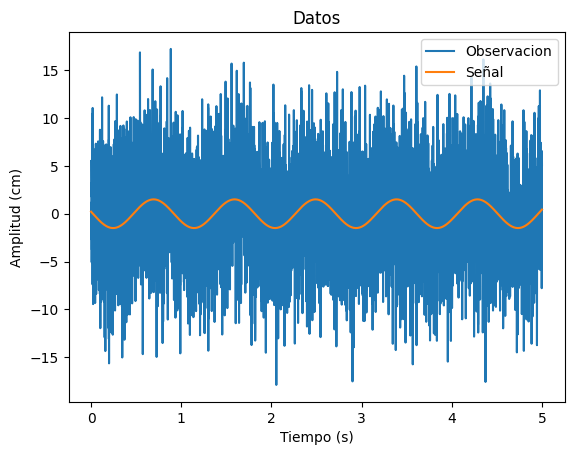

In [49]:
plt.plot(t,x,label='Observacion')
plt.plot(t,h,label='Señal')
plt.title('Datos')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (cm)')
plt.legend()

### 2.3 Metodología para la estimación de parámetros

Una vez que tenemos los datos y contamos con un modelo (ya sea exacto o aproximado). Podemos usar la librería de inferencia bayesiana [BILBY](https://lscsoft.docs.ligo.org/bilby/index.html), implementada no solamente para ondas gravitacionales sino para cualquier otro modelo.

Para ello, necesitamos un modelo analítico, una función de verosimilitud y PDFs previas para cada parámetro.

##### Modelo analítico
$$
h(t;A,\omega,\phi) = A\sin(\omega t + \phi)
$$
#### Función de Verosimilitud (Likelihood)
Esta función va a depender de la naturaleza del ruido, ya sea gaussiano blanco o coloreado, se utiliza también una Likelihood Gaussiana, en ocasiones ponderada por la Densidad Espectral de Energía del ruido.

$$
\mathcal{L}(D|\boldsymbol{\Theta}) = \frac{1}{(2\pi\sigma^{2})^{\frac{N}{2}}} \exp\left[ -\frac{1}{2\sigma^{2}} \sum_{n=0}^{N-1} (x[n]-h[n])^{2} \right]
$$

Que funciona para ruido gaussiano blanco.

El sampler de MCMC para bilby, permite introducir cada una de estas piezas, entre otros hiperparámetros, como el número de muestras, de cadenas, el criterio de convergencia, etc.

In [45]:
# Instalar Bilby
!pip install bilby

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 940.1/940.1 kB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.1/108.1 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 4.7 MB/s eta 0:00:00


In [46]:
import bilby

In [47]:
# Definimos Priors
priors = dict(
    A=bilby.core.prior.Uniform(1, 5, "A"),
    omega=bilby.core.prior.Uniform(1, 10, "omega"),
    phi=bilby.core.prior.Uniform(-2*np.pi, 2*np.pi, "phi"),
)

In [53]:
# Definir Likelihood
likelihood = bilby.core.likelihood.GaussianLikelihood(t,x,sinus,sigma)

In [67]:
result = bilby.run_sampler(
    likelihood,
    priors,
    sampler="bilby_mcmc",
    proposal_cycle='default',  # no GW proposal cycle
    )

04:14 bilby INFO    : Running for label 'label', output will be saved to 'outdir'
04:14 bilby WARNING : Parameter logl has no default prior and is set to -15508.476461575869, this will not be sampled and may cause an error.
04:14 bilby WARNING : Parameter logp has no default prior and is set to -6.114543185425401, this will not be sampled and may cause an error.
/usr/local/lib/python3.10/dist-packages/bilby/core/utils/log.py:73: UserWarning: The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.
  vdict[key] = str(getattr(sys.modules[key], "__version__", "N/A"))
04:14 bilby INFO    : Analysis priors:
04:14 bilby INFO    : A=Uniform(minimum=1, maximum=5, name='A', latex_label='A', unit=None, boundary=None)
04:14 bilby INFO    : omega=Uniform(minimum=1, maximum=10, name='omega', latex_label='omega', unit=None, boundary=None)
04:14 bilby INFO    : phi=Uniform(minimum=-6.283185307179586

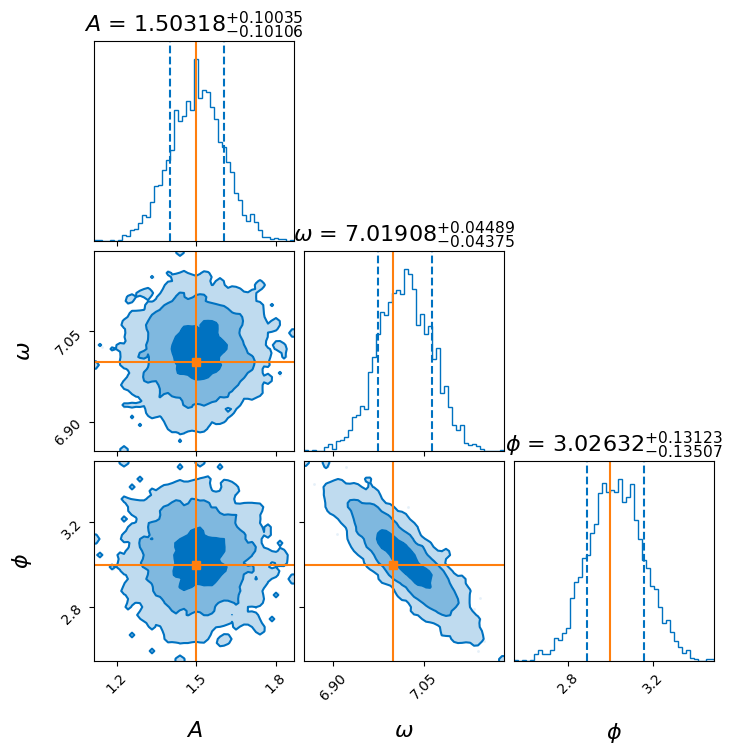

In [68]:
result.plot_corner(parameters=dict(A=A,omega=omega,phi=phi),labels = [r'$A$',r'$\omega$',r'$\phi$'],show_titles=True,title_quantiles=[0.16,0.5,0.84],title_fmt='.5f')

In [70]:
result_dyn = bilby.run_sampler(
    likelihood,
    priors,
    nlive=500,
    outdir='out_dyn',
    sampler="dynesty"
    )

04:16 bilby INFO    : Running for label 'label', output will be saved to 'out_dyn'
04:16 bilby WARNING : Parameter logl has no default prior and is set to -15508.476461575869, this will not be sampled and may cause an error.
04:16 bilby WARNING : Parameter logp has no default prior and is set to -6.114543185425401, this will not be sampled and may cause an error.
/usr/local/lib/python3.10/dist-packages/bilby/core/utils/log.py:73: UserWarning: The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.
  vdict[key] = str(getattr(sys.modules[key], "__version__", "N/A"))
04:16 bilby INFO    : Analysis priors:
04:16 bilby INFO    : A=Uniform(minimum=1, maximum=5, name='A', latex_label='A', unit=None, boundary=None)
04:16 bilby INFO    : omega=Uniform(minimum=1, maximum=10, name='omega', latex_label='omega', unit=None, boundary=None)
04:16 bilby INFO    : phi=Uniform(minimum=-6.28318530717958

1it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/dynesty/sampler.py:761: UserWarning: The sampling was stopped short due to maxiter/maxcall limit the delta(log(z)) criterion is not achieved; posterior may be poorly sampled
  warnings.warn('The sampling was stopped short due to'
04:17 bilby INFO    : Written checkpoint file out_dyn/label_resume.pickle
/usr/local/lib/python3.10/dist-packages/dynesty/plotting.py:318: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
04:17 bilby INFO    : Rejection sampling nested samples to obtain 1635 posterior samples
04:17 bilby INFO    : Sampling time: 0:01:25.379707


04:17 bilby INFO    : Summary of results:
nsamples: 1635
ln_noise_evidence:    nan
ln_evidence: -15517.615 +/-  0.169
ln_bayes_factor:    nan +/-  0.169



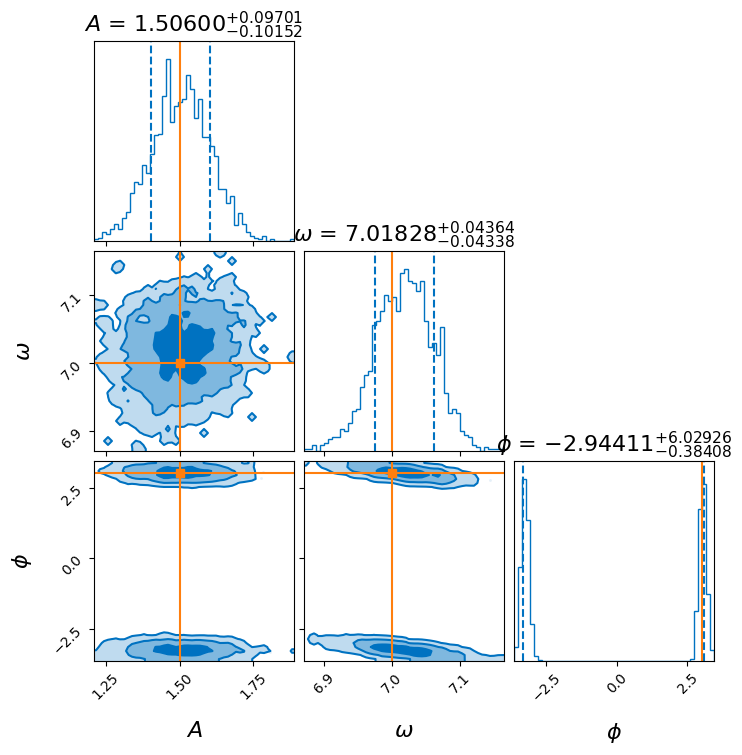

In [72]:
result_dyn.plot_corner(parameters=dict(A=A,omega=omega,phi=phi),labels = [r'$A$',r'$\omega$',r'$\phi$'],show_titles=True,title_quantiles=[0.16,0.5,0.84],title_fmt='.5f')

A pesar de que los parámetros son considerados distribuciones de probabilidad, existe un valor que mejor ajusta el modelo a los datos. Esto depende mucho de la apariencia que tenga la distribución posterior pero usualmente este valor es el promedio de la distribución.

### Ejercicio:
Repite el procedimiento seguido para la estimación de parámetros pero ahora genera datos sintéticos considerando que el modelo es una línea recta. Puedes elegir entre cualquiera de los samplers de bilby, `MCMC` o `Dynesty`.